# ２次関数のフィッティング

In [268]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import torch

N = 100
M = 500

np.random.seed(123)
x = np.random.randn(N)
y = x ** 2 + np.random.randn(N) * 0.1

x = torch.tensor(x).float()
y = torch.tensor(y).float()

x_train = x[:N // 2]
x_test  = x[N // 2:]
y_train = y[:N // 2]
y_test  = y[N // 2:]


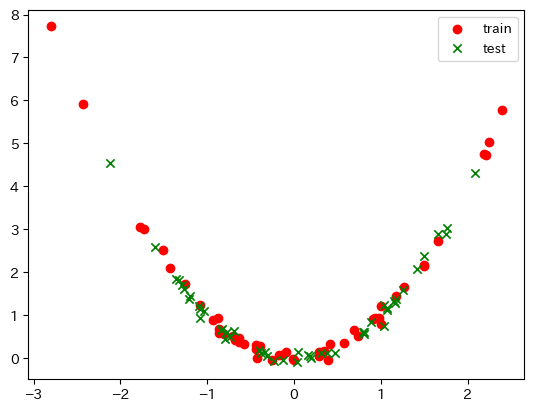

In [269]:
plt.scatter(x_train, y_train, c='r', label='train')
plt.scatter(x_test, y_test, c='g', marker='x', label='test')
plt.legend()

In [270]:
from torch import nn

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        super().__init__()
        relu = nn.ReLU(inplace=True)
        # これがレイヤー関数
        self.net = nn.Sequential(
            nn.Linear(n_input, M),
            relu,
            nn.Linear(M, n_output),
        )
    def forward(self, x):
        return self.net(x)

net = Net(N // 2, N // 2)

outputs = net(x_train)


In [271]:
for param in net.named_parameters():
    print(param)

('net.0.weight', Parameter containing:
tensor([[ 0.0059,  0.1257,  0.0125,  ..., -0.0346,  0.0401, -0.0545],
        [-0.0029, -0.0928, -0.1130,  ...,  0.0513, -0.0493,  0.0981],
        [ 0.1374, -0.1346, -0.1298,  ...,  0.0495, -0.0006,  0.1160],
        ...,
        [-0.0779,  0.0422,  0.0753,  ...,  0.1092,  0.1351, -0.1124],
        [ 0.0514, -0.0417,  0.0789,  ..., -0.0651, -0.0994, -0.0687],
        [-0.1319, -0.1289, -0.0317,  ...,  0.0636,  0.0038, -0.0476]],
       requires_grad=True))
('net.0.bias', Parameter containing:
tensor([-0.0609,  0.0547,  0.0887, -0.0818, -0.0635,  0.0307, -0.0731, -0.1306,
         0.1337,  0.0765,  0.0053,  0.0466, -0.0304,  0.0318, -0.0211, -0.0050,
        -0.1198, -0.0436,  0.0192, -0.0674, -0.0349, -0.0576,  0.1002,  0.0099,
         0.1392, -0.0796,  0.1178,  0.0028, -0.0316,  0.0623, -0.0937, -0.0978,
        -0.0886, -0.0545,  0.0308,  0.0288, -0.0726, -0.1198,  0.0256, -0.0196,
         0.1169,  0.0985,  0.0534, -0.1405, -0.0037, -0.0597, 

In [272]:
criterion = nn.MSELoss().float()

#loss = criterion(outputs, y_train) / 2.0

#from torchviz import make_dot
#g = make_dot(loss, params=dict(net.named_parameters()))
#display(g)


In [273]:
#loss.backward()

In [274]:
import torch.optim as optim

lr = 0.001
optimizer = optim.SGD(net.parameters(), lr=lr)

#optimizer.step()
#optimizer.zero_grad()

In [275]:
num_epochs = 2000

history = np.array((0, 2))
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = net(x_train)
    loss = criterion(outputs, y_train) / 2.0
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 100 == 0:
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch / Loss = {epoch} / {loss.item():.5f}')


Epoch / Loss = 0 / 2.77251
Epoch / Loss = 100 / 1.66291
Epoch / Loss = 200 / 0.91591
Epoch / Loss = 300 / 0.44047
Epoch / Loss = 400 / 0.18448
Epoch / Loss = 500 / 0.06914
Epoch / Loss = 600 / 0.02403
Epoch / Loss = 700 / 0.00799
Epoch / Loss = 800 / 0.00260
Epoch / Loss = 900 / 0.00084
Epoch / Loss = 1000 / 0.00027
Epoch / Loss = 1100 / 0.00009
Epoch / Loss = 1200 / 0.00003
Epoch / Loss = 1300 / 0.00001
Epoch / Loss = 1400 / 0.00000
Epoch / Loss = 1500 / 0.00000
Epoch / Loss = 1600 / 0.00000
Epoch / Loss = 1700 / 0.00000
Epoch / Loss = 1800 / 0.00000
Epoch / Loss = 1900 / 0.00000


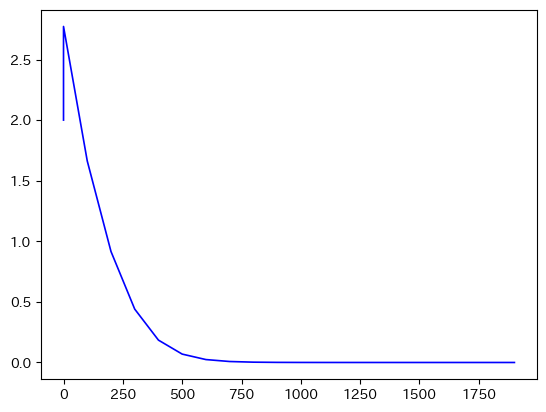

In [276]:
plt.plot(history[:, 0], history[:, 1], 'b')

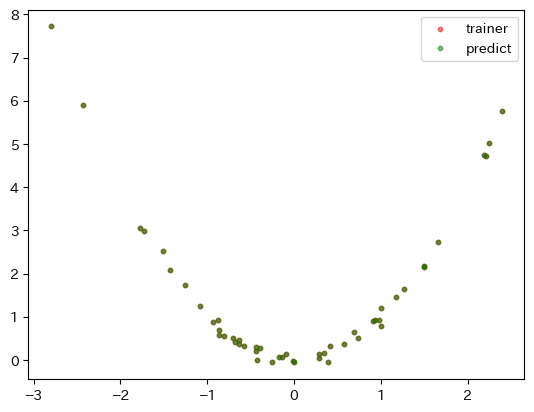

In [277]:
plt.scatter(x_train.data.numpy(), y_train.data.numpy(), c='r', s=10, label='trainer', alpha=0.5)
plt.scatter(x_train.data.numpy(), outputs.data.numpy(), c='g', s=10, label='predict', alpha=0.5)
plt.legend()

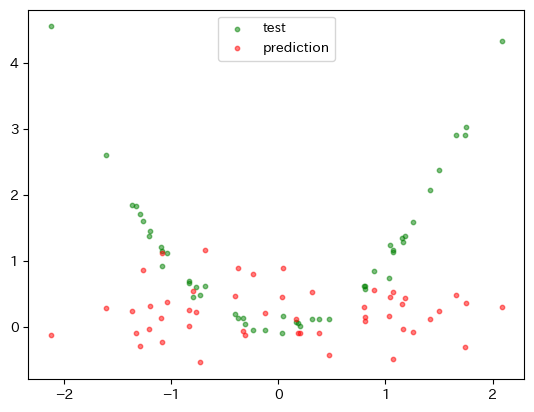

In [278]:
plt.scatter(x_test.data.numpy(), y_test.data.numpy(), c='g', s=10, label='test', alpha=0.5)
plt.scatter(x_test.data.numpy(), net(x_test).data.numpy(), c='r', s=10, label='prediction', alpha=0.5)
plt.legend()